<a href="https://colab.research.google.com/github/fkivuti/imbalanced_classification/blob/main/Imbalanced_Classification_project_Francis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisite

In [38]:
# Import the initial libraries
import pandas as pd
import numpy as np

In [88]:
# load data and previerew first few lines of the output
bank_df =  pd.read_csv('https://bit.ly/2XZK7Bo')
bank_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


# Success criteria

This project will be successful if we get a model that gives us an F1 score above 0.59

# Data Exploration

In [89]:
# check the dataframe shape
bank_df.shape

(10000, 14)

In [90]:
# view the unique object for none numeric columns -  Geography
bank_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [91]:
# view the unique object for none numeric columns -  Gender
bank_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [92]:
bank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [93]:
# check for duplicates
bank_df[bank_df.duplicated(['CustomerId'])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


There are no duplicate observations based on customerid

In [94]:
#check for null values
bank_df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Tenure column has 909 null values

In [95]:
# check statistical summary
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Cleanup and Preparation


In [96]:
# drop the Row number Customer id and Surname columns as we wont require them for modelling leaving us with 11 columns
bank_df = bank_df.drop(columns=['Surname', 'RowNumber', 'CustomerId'], axis=1)
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [97]:
# impute missing the 909 missing values in the Tenure column with the mean
bank_df['Tenure'] = bank_df['Tenure'].fillna(bank_df['Tenure'].mean())
bank_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We dont have any missing values in the dataFrame

In [98]:
#Preview the dataframe
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [99]:
# Converting non numerical columns to numerical columns
# Iterate through the columns in the dataframe and find unique elements for non numeric columns. We will take a set  of the column values and 
# thus the set within the index within the set will be the new numerical value or id of that non numerical observation.

# create a function that gets the columns and interate through them

def handle_non_numerical_data(bank_df):
    columns = bank_df.columns.values
    for column in columns:

# Embed a function that converts the parameter value to the any value of that item (as Key) from the text_digit_val dictionary

        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

# During iteration through the columns, check and pick columns which are not int64 or float64 and then convert the column to list of its values
        if bank_df[column].dtype != np.int64 and bank_df[column].dtype != np.float64:
            column_contents = bank_df[column].values.tolist()

# Take a set of the columns and extract the unique values only.            
            unique_elements = set(column_contents)

# Create a new dictionary key for each of the unique values found with avalye of a new number.
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

# Use the map function to perform mapping of the new values into the columns
            bank_df[column] = list(map(convert_to_int, bank_df[column]))

    return bank_df


# Call our handle_non_numerical_data function and preview the newly converted data frame

bank_df = handle_non_numerical_data(bank_df)
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,1,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,2,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,2,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,1,0,43,2.0,125510.82,1,1,1,79084.10,0


In [100]:
bank_df.shape

(10000, 11)

In [101]:
bank_df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Check columns correlation



In [102]:
# create a corelation matrix
corrmat = bank_df.corr()
corrmat

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008267,-0.002857,-0.003965,-0.000059,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.008267,1.000000,0.016936,-0.048092,0.002889,-0.348700,0.006180,-0.004036,0.012692,-0.007382,-0.153771
Gender,-0.002857,0.016936,1.000000,-0.027544,0.012043,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,-0.048092,-0.027544,1.000000,-0.012604,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.000059,0.002889,0.012043,-0.012604,1.000000,-0.007534,0.011409,0.025978,-0.030680,0.010050,-0.015988
Balance,0.006268,-0.348700,0.012087,0.028308,-0.007534,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.006180,-0.021859,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.004036,0.005766,-0.011721,0.025978,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.012692,0.022544,0.085472,-0.030680,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007382,-0.008112,-0.007201,0.010050,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


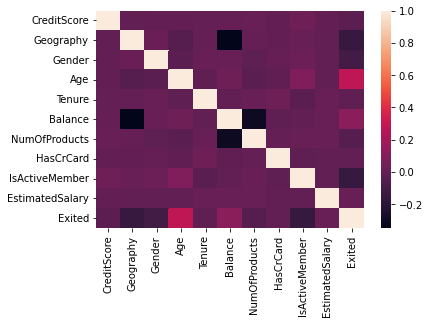

In [62]:
# Correlation Matrix heatmap using seaborn.
# import seaborn library
import seaborn as sns
sns.heatmap(corrmat)

# Modelling

# 1. Model before balancing and normalization

First model the dataframe as is currently before balancing class weights and normalization to see the F1 output we will get from various models.

In [ ]:
# Due to the slight correlation seen between Age and Exited columns and also Age and Is Active Member Columns we drop the Age column
# bank_df = bank_df.drop(columns = ['Age'], axis=1)
# bank_df.head()

In [103]:
# Split the dataset into features and targets
features =  bank_df.iloc[:, : -1].values  # allocate all columns to features except the last column
target = bank_df.iloc[:, 10].values # allocated the exited column to target

In [109]:
# Split the dataset into test and train data. Test dataset will be 25% of the entire dataset
# First import the train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [110]:
# Import the logistic regression, decision Tree, random forest classifier models as well as the F1 score metric
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score

# Initiate the models
logistic_classifier = LogisticRegression(random_state=42)
decision_classifier = DecisionTreeClassifier(random_state=42)
random_classifier = RandomForestClassifier(random_state=42)

# Train the models
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
random_classifier.fit(X_train, y_train)

# Predict the testset results
logistic_y_predict = logistic_classifier.predict(X_test)
decision_y_predict =  decision_classifier.predict(X_test)
random_y_predict = random_classifier.predict(X_test)

# check the F1 scores for the models
print('logistic_F1:', f1_score(y_test, logistic_y_predict))
print('decicion_F1:', f1_score(y_test, decision_y_predict))
print('random_F1:', f1_score(y_test, random_y_predict))


logistic_F1: 0.12691466083150987
decicion_F1: 0.48235294117647065
random_F1: 0.5889570552147239


Random forest classifier gives us the highest F1 score of 0.59.

# 2. Model after balancing and normalization

In [106]:
# import minmax scalar
# We perform normalisation to scale our objects between 0 and 1 so as to get better accuracy. we note that Estimated salary and Balance columns have data proportions that are so high
# from sklearn.preprocessing import MinMaxScaler 
# from sklearn.model_selection import train_test_split
# X_train2, X_test2, y_train2, y_test2 = train_test_split(features, target, test_size = 0.2, random_state = 42)
# norm = MinMaxScaler().fit(X_train2)
# X_train2 = norm.transform(X_train2)
# X_test2 = norm.transform(X_test2)

In [111]:
# scaling features
from sklearn.preprocessing import StandardScaler
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, target, test_size = 0.2, random_state = 42)
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train2 = sc_X.fit_transform(X_train)
X_test2 = sc_y.fit_transform(X_test)

In [112]:
# we implement balanced class weights 
# Initiate the models
logistic_classifier = LogisticRegression(class_weight='balanced', random_state=42)
decision_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)
random_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the models
logistic_classifier.fit(X_train2, y_train2)
decision_classifier.fit(X_train2, y_train2)
random_classifier.fit(X_train2, y_train2)

# Predict the testset results
logistic_y_predict2 = logistic_classifier.predict(X_test2)
decision_y_predict2 =  decision_classifier.predict(X_test2)
random_y_predict2 = random_classifier.predict(X_test2)

# check the F1 scores for the models
print('logistic_F1:', f1_score(y_test, logistic_y_predict2))
print('decicion_F1:', f1_score(y_test, decision_y_predict2))
print('random_F1:', f1_score(y_test, random_y_predict2))

logistic_F1: 0.4941388638412985
decicion_F1: 0.47843137254901963
random_F1: 0.5764331210191083


- Upon normalization and balancing the class weights, the Logistic regression F1 score improves from 0.07 to 0.5 though still below the target. 
- The random forest  F1 score drop a bit from 0.59 to 0.58 upon normalization and balancing of classes

There is very low correlation between the columns thus no need to drop any of them

# AUC_ROC computation

In [113]:
# Import roc_curve and roc_auc_score metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Initiate the models
logistic_classifier = LogisticRegression(random_state=42)
decision_classifier = DecisionTreeClassifier(random_state=42)
random_classifier = RandomForestClassifier(random_state=42)

# Train the models
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
random_classifier.fit(X_train, y_train)

# Predict the probabilities
logistic_y_prob = logistic_classifier.predict_proba(X_test)
decision_y_prob =  decision_classifier.predict_proba(X_test)
random_y_prob = random_classifier.predict_proba(X_test)

# auc_roc takes class one probabilities
logistic_y_prob_one = logistic_y_prob [:, 1]
decision_y_prob_one =  decision_y_prob [:, 1]
random_y_prob_one = random_y_prob [:, 1]


fpr, tpr, thresholds =  roc_curve(y_test, logistic_y_prob_one) 
fpr, tpr, thresholds =  roc_curve(y_test, decision_y_prob_one) 
fpr, tpr, thresholds =  roc_curve(y_test, random_y_prob_one) 

auc_roc_logistic = roc_auc_score(y_test, logistic_y_prob_one)
auc_roc_decision = roc_auc_score(y_test, decision_y_prob_one)
auc_roc_random = roc_auc_score(y_test, random_y_prob_one)

print(" Logistic auc_roc :", auc_roc_logistic)
print(" decision auc_roc :", auc_roc_decision)
print(" random auc_roc :", auc_roc_random)





 Logistic auc_roc : 0.6690781900432428
 decision auc_roc : 0.6824072798554669
 random auc_roc : 0.8587018308893501


Again we note that random forest had a very high score of 0.86 meaning that it was able to a great extent distinguish betweeen positive and negative classes

In [116]:
# Lets predict if a cutomer will exit or not using a sample dataset
# Define sample data that will be used to predict the 'is_promoted' outcome.

features =  bank_df.drop(['Exited'], axis=1)
new_features = pd.DataFrame(
    [
        [800,	2,	1,	60,	2.0,	2000.00,	1,	0,	1,	10348.88	],
    ],
    columns=features.columns
)

exited = random_classifier.predict(new_features)
print(exited)

[1]


This sample customer will exit the bank based on the features

# Findings



 - Random Forest model gave us an F1 score of 59 before scaling features and aplying weighting on classes

 - The same model gave us an auc_roc score of 0.86 which is really good

 - The features use to predict had very minimal correlation hence there was no need to remove any of them.

 - Standard scaler gave us better scores than the Min Max scaler though the final F1 scores were much lower compared to the results realized before scaling features.

 - Still looking for futher optimization to increase the F1 score to above 59.